# Titanic Survival Case

Problem Statement:

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 
It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [3]:
data =pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
945,946,0,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
946,947,0,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.1250,NaN,Q
947,948,0,3,"Cor, Mr. Bartol",male,35.0,0,0,349230,7.8958,NaN,S
948,949,1,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S


In [4]:
ds=pd.DataFrame(data=data)

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  950 non-null    int64  
 1   Survived     950 non-null    int64  
 2   Pclass       950 non-null    int64  
 3   Name         950 non-null    object 
 4   Sex          950 non-null    object 
 5   Age          764 non-null    float64
 6   SibSp        950 non-null    int64  
 7   ParCh        950 non-null    int64  
 8   Ticket       950 non-null    object 
 9   Fare         950 non-null    float64
 10  Cabin        217 non-null    object 
 11  Embarked     948 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 89.2+ KB


There are 950 rows and 12 coulmns , pclass, Name, Sex , Ticket , Cabim, Embarked are object type and remaning variables are numeric.

In [6]:
#Check duplicate rows in data
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 12)


In [7]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,ParCh,Fare
count,950.000000,950.000000,950.000000,764.000000,950.000000,950.000000,950.000000
mean,475.500000,0.382105,2.304211,29.876531,0.525263,0.377895,32.183008
std,274.385677,0.486158,0.838411,14.457575,1.087768,0.798666,49.561028
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,238.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,475.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,712.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,950.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Key Observations: 1)From the table above it can be seen that the column "name" is 0 and not contributing to the data we can remove it. 2))The mean and median(50%) is similar in all the column expet fate 3)Thers is not much differnce between the values of 75% aand max for all the columns except fare.

In [8]:
#Looking for null values
print(ds.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            186
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          733
Embarked         2
dtype: int64


There are missing values in Survived,Age,Cabin,Embarked,Fare columns

<AxesSubplot:>

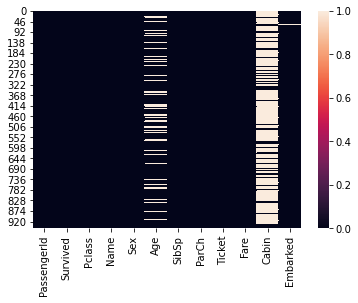

In [9]:
sns.heatmap(ds.isnull())

the heat map cleary shows there is missing values in Survived,Age,Cabin,Embarked,Fare columns

<AxesSubplot:>

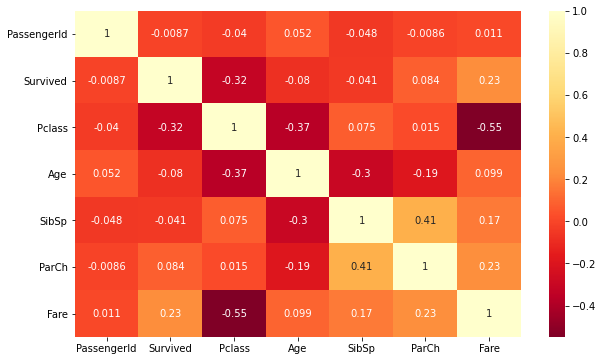

In [10]:
dfcor=ds.corr()
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

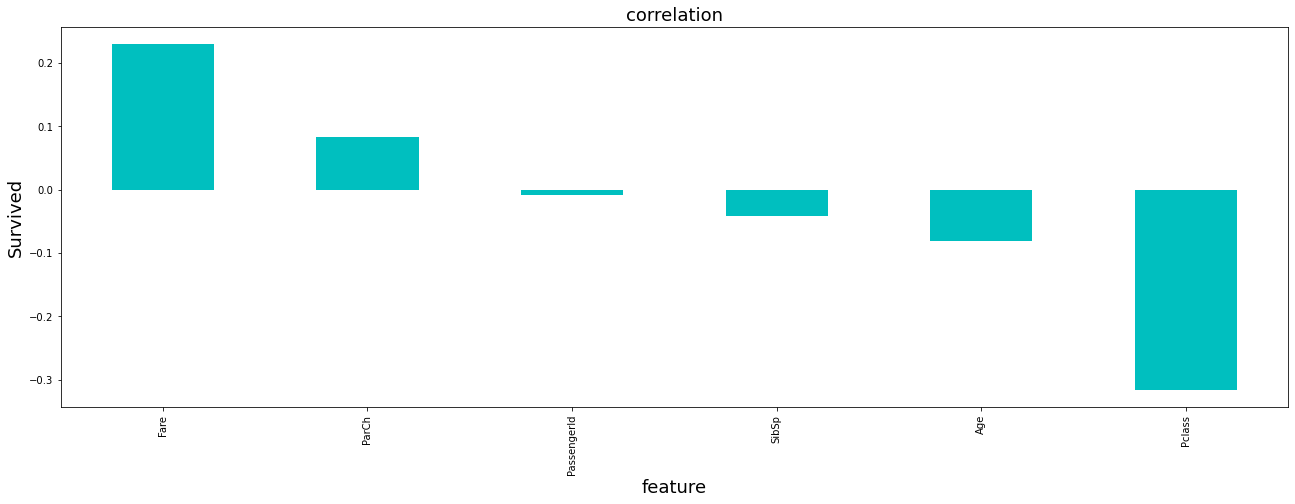

In [11]:
plt.figure(figsize=(22,7))
ds.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=18)
plt.ylabel('Survived',fontsize=18)
plt.title('correlation',fontsize =18)
plt.show()

Key Observation: there is positve correlation of Fare,Parch,Pasengerid with Survived.
Negative correlation of Age,Pclass,SbSp with Survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

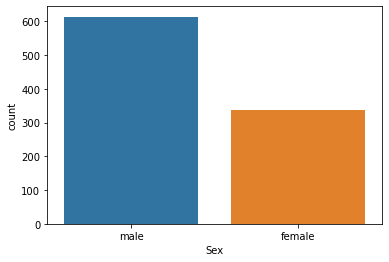

In [12]:
sns.countplot(x='Sex',data=ds)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

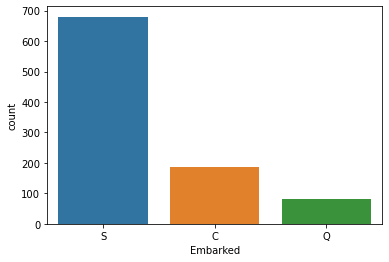

In [13]:
sns.countplot(x='Embarked',data=ds)

<AxesSubplot:xlabel='Survived', ylabel='count'>

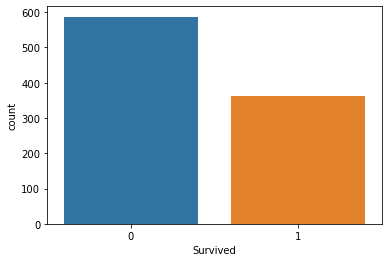

In [14]:
sns.countplot(x='Survived',data=ds)

There is class Imbalance 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

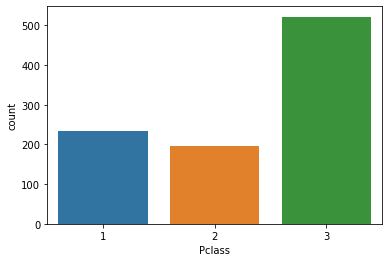

In [15]:

sns.countplot(x='Pclass',data=ds)

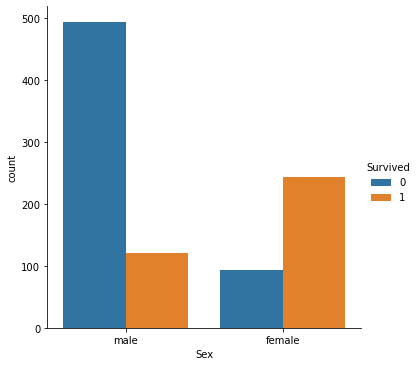

In [16]:
#Countplot
sns.catplot(x ="Sex", hue ="Survived", 
kind ="count", data = ds)

By observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 50%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

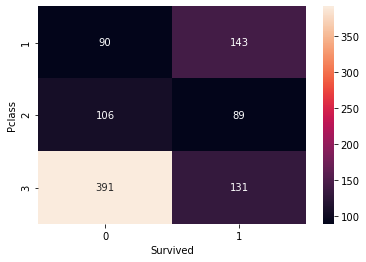

In [17]:
#Pclass (Ordinal Feature) vs Survived 
#Group the dataset by Pclass and Survived and then unstack them
group = ds.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
  
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

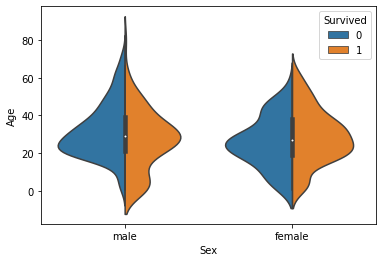

In [18]:
#Age (Continuous Feature) vs Survived
#Violinplot Displays distribution of data 
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = ds, split = True)

This graph gives a summary of the age range of men, women and children who were saved.The survival rate is –
Good for children.
High for women in the age range 20-50.
Less for men as the age increases.
Since Age column is important, the missing values need to be filled

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

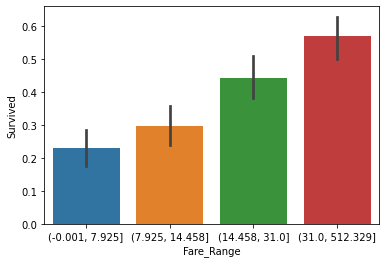

In [19]:
#Bar Plot for Fare (Continuous Feature)
# Divide Fare into 4 bins
ds['Fare_Range'] = pd.qcut(ds['Fare'], 4)
  
# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', 
data = ds)

It can be observed here that that if a passenger paid a higher fare, the survival rate is more

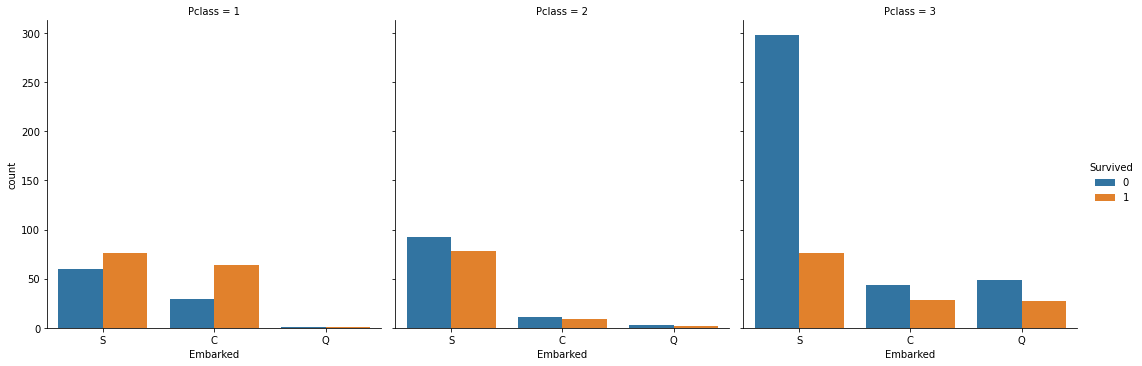

In [20]:
#Categorical Count Plots for Embarked Feature
# Countplot
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = ds)

Key observations are:
1)Majority of the passengers boarded from S. So, the missing values can be filled with S.
2)Majority of class 3 passengers boarded from Q.
3) S looks lucky for class 1 and 2 passengers compared to class 3.

In [21]:
#sns.pairplot(ds)

# Data Wrangling

In [22]:
#Lets try to drop some of the columns which many not contribute much to our machine learning model 
#such as Name etc.

ds = ds.drop(['Name'],axis=1)
ds

,PassengerId,Survived,Pclass,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Fare_Range
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.925]"
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]"
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(-0.001, 7.925]"
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"(31.0, 512.329]"
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"(7.925, 14.458]"
...,...,...,...,...,...,...,...,...,...,...,...,...
945,946,0,2,male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C,"(14.458, 31.0]"
946,947,0,3,male,10.0,4,1,382652,29.1250,NaN,Q,"(14.458, 31.0]"
947,948,0,3,male,35.0,0,0,349230,7.8958,NaN,S,"(-0.001, 7.925]"
948,949,1,3,male,25.0,0,0,348122,7.6500,F G63,S,"(-0.001, 7.925]"


In [23]:
#replacing missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
imd = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
ds['Age']=imp.fit_transform(data['Age'].values.reshape(-1,1))
ds['Fare']=imp.fit_transform(data['Fare'].values.reshape(-1,1))
ds['Survived']=imp.fit_transform(data['Survived'].values.reshape(-1,1))
ds['Cabin']=imd.fit_transform(data['Cabin'].values.reshape(-1,1))[:,0]
ds['Embarked']=imd.fit_transform(data['Embarked'].values.reshape(-1,1))[:,0]
ds

,PassengerId,Survived,Pclass,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Fare_Range
0,1,0.0,3,male,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S,"(-0.001, 7.925]"
1,2,1.0,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]"
2,3,1.0,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,"(-0.001, 7.925]"
3,4,1.0,1,female,35.000000,1,0,113803,53.1000,C123,S,"(31.0, 512.329]"
4,5,0.0,3,male,35.000000,0,0,373450,8.0500,C23 C25 C27,S,"(7.925, 14.458]"
...,...,...,...,...,...,...,...,...,...,...,...,...
945,946,0.0,2,male,29.876531,0,0,SC/A.3 2861,15.5792,C23 C25 C27,C,"(14.458, 31.0]"
946,947,0.0,3,male,10.000000,4,1,382652,29.1250,C23 C25 C27,Q,"(14.458, 31.0]"
947,948,0.0,3,male,35.000000,0,0,349230,7.8958,C23 C25 C27,S,"(-0.001, 7.925]"
948,949,1.0,3,male,25.000000,0,0,348122,7.6500,F G63,S,"(-0.001, 7.925]"


In [24]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
ParCh          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Fare_Range     0
dtype: int64

In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  950 non-null    int64   
 1   Survived     950 non-null    float64 
 2   Pclass       950 non-null    int64   
 3   Sex          950 non-null    object  
 4   Age          950 non-null    float64 
 5   SibSp        950 non-null    int64   
 6   ParCh        950 non-null    int64   
 7   Ticket       950 non-null    object  
 8   Fare         950 non-null    float64 
 9   Cabin        950 non-null    object  
 10  Embarked     950 non-null    object  
 11  Fare_Range   950 non-null    category
dtypes: category(1), float64(3), int64(4), object(4)
memory usage: 82.9+ KB


In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
oe =  OrdinalEncoder()
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=oe.fit_transform(ds[i].values.reshape(-1,1))
ds

,PassengerId,Survived,Pclass,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Fare_Range
0,1,0.0,3,1.0,22.000000,1,0,550.0,7.2500,67.0,2.0,"(-0.001, 7.925]"
1,2,1.0,1,0.0,38.000000,1,0,627.0,71.2833,86.0,0.0,"(31.0, 512.329]"
2,3,1.0,3,0.0,26.000000,0,0,705.0,7.9250,67.0,2.0,"(-0.001, 7.925]"
3,4,1.0,1,0.0,35.000000,1,0,51.0,53.1000,59.0,2.0,"(31.0, 512.329]"
4,5,0.0,3,1.0,35.000000,0,0,497.0,8.0500,67.0,2.0,"(7.925, 14.458]"
...,...,...,...,...,...,...,...,...,...,...,...,...
945,946,0.0,2,1.0,29.876531,0,0,657.0,15.5792,67.0,0.0,"(14.458, 31.0]"
946,947,0.0,3,1.0,10.000000,4,1,505.0,29.1250,67.0,1.0,"(14.458, 31.0]"
947,948,0.0,3,1.0,35.000000,0,0,395.0,7.8958,67.0,2.0,"(-0.001, 7.925]"
948,949,1.0,3,1.0,25.000000,0,0,367.0,7.6500,145.0,2.0,"(-0.001, 7.925]"


PassengerId       AxesSubplot(0.125,0.125;0.0545775x0.755)
Survived       AxesSubplot(0.190493,0.125;0.0545775x0.755)
Pclass         AxesSubplot(0.255986,0.125;0.0545775x0.755)
Sex            AxesSubplot(0.321479,0.125;0.0545775x0.755)
Age            AxesSubplot(0.386972,0.125;0.0545775x0.755)
SibSp          AxesSubplot(0.452465,0.125;0.0545775x0.755)
ParCh          AxesSubplot(0.517958,0.125;0.0545775x0.755)
Ticket         AxesSubplot(0.583451,0.125;0.0545775x0.755)
Fare           AxesSubplot(0.648944,0.125;0.0545775x0.755)
Cabin          AxesSubplot(0.714437,0.125;0.0545775x0.755)
Embarked        AxesSubplot(0.77993,0.125;0.0545775x0.755)
dtype: object

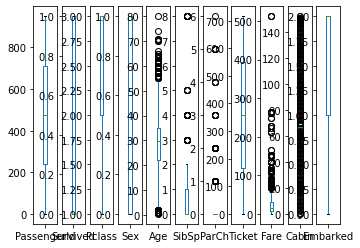

In [27]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,12))

<AxesSubplot:>

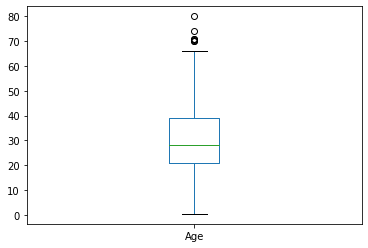

In [28]:
data['Age'].plot.box()

<AxesSubplot:>

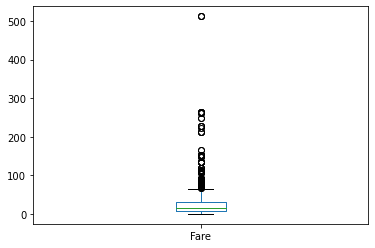

In [29]:
data['Fare'].plot.box()

In [30]:
# Checking the skewness
ds.skew()

PassengerId    0.000000
Survived       0.486029
Pclass        -0.620926
Sex           -0.613024
Age            0.436712
SibSp          3.659011
ParCh          2.734982
Ticket        -0.009088
Fare           4.738694
Cabin          1.276720
Embarked      -1.221416
dtype: float64

In [31]:
dsnew['Fare']=np.sqrt(dsnew['Fare'])
sns.histplot(dsnew['Fare'])

NameError: name 'dsnew' is not defined

In [32]:
# Segregatting the data into features and target variable
ds = ds.drop(columns = ['Fare_Range'])

In [34]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(ds))
z
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 284, 299,
       311, 324, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394, 437,
       438, 438, 462, 475, 480, 493, 516, 527, 541, 542, 556, 557, 558,
       567, 583, 585, 599, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885, 915, 915, 919, 944, 946, 948], dtype=int64), array([9, 9, 6, 5, 6, 8, 5, 5, 9, 5, 5, 9, 6, 8, 4, 4, 8, 5, 9, 9, 5, 5,
       6, 5, 5, 5, 9, 9, 5, 9, 5, 9, 8, 5, 9, 5, 5, 9, 8, 8, 5, 9, 9, 8,
       9, 6, 9, 8, 8, 5, 9, 6, 6, 8, 9, 9, 5, 4, 9, 8, 5, 5, 9, 8, 9, 6,
       9, 9, 9, 6, 9, 4, 6, 9, 4, 6, 8, 5, 5, 8, 9, 8, 9, 8, 9, 8, 6, 8,
       8, 4, 9, 6, 9, 8, 5, 5, 9, 5, 5, 9, 5, 5, 4, 6, 5, 6, 6, 8, 9,

In [35]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 36 rows will be droped

shape before remooving the outliers: (950, 11)
shape after remooving the outliers: (840, 11)


In [36]:
dsnew.shape

(840, 11)

In [37]:
x = dsnew.drop(columns = ['Survived'])
y = dsnew['Survived']

In [38]:
x.shape

(840, 10)

In [39]:
y.shape

(840,)

In [40]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [41]:
y_over.value_counts()

1.0    518
0.0    518
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

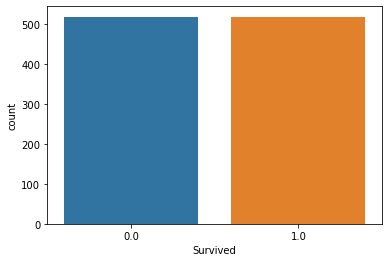

In [42]:
sns.countplot(y_over,data=dsnew)

In [46]:
x_over.shape

(1036, 10)

In [47]:
y_over.shape

(1036,)

In [50]:
# To find the best random state using logistic Regressor model

maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.8295819935691319 on random state 12


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 10)
(311, 10)
(725,)
(311,)


# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore oue evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report

In [52]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8295819935691319
[[145  26]
 [ 27 113]]
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       171
         1.0       0.81      0.81      0.81       140

    accuracy                           0.83       311
   macro avg       0.83      0.83      0.83       311
weighted avg       0.83      0.83      0.83       311



In [53]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7684887459807074
[[145  26]
 [ 46  94]]
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       171
         1.0       0.78      0.67      0.72       140

    accuracy                           0.77       311
   macro avg       0.77      0.76      0.76       311
weighted avg       0.77      0.77      0.77       311



In [54]:
#RandomForest classifcation Model
rf= RandomForestClassifier(n_estimators=100,random_state=0)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8295819935691319
[[149  22]
 [ 31 109]]
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       171
         1.0       0.83      0.78      0.80       140

    accuracy                           0.83       311
   macro avg       0.83      0.82      0.83       311
weighted avg       0.83      0.83      0.83       311



In [55]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7620578778135049
[[133  38]
 [ 36 104]]
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       171
         1.0       0.73      0.74      0.74       140

    accuracy                           0.76       311
   macro avg       0.76      0.76      0.76       311
weighted avg       0.76      0.76      0.76       311



In [56]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.617363344051447
[[112  59]
 [ 60  80]]
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65       171
         1.0       0.58      0.57      0.57       140

    accuracy                           0.62       311
   macro avg       0.61      0.61      0.61       311
weighted avg       0.62      0.62      0.62       311



Based on the results of above models, and capomaring the Accuracy score and other evalution matrics result of recall, precision. Accuracy_Score

Random Forest & Logistic regressorr have the best accuracy score among the 6 alogorithims used above.To find the best Model for prediction in our case.Lets do cross validation.

# Cross Validation

Cross check the accuracy of the algorithim used above

In [58]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.71428571 0.80357143 0.75595238 0.78571429 0.76190476]
0.7642857142857142 0.030257773874140085


In [59]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.66071429 0.76190476 0.79761905 0.75595238 0.77380952]
0.7499999999999999 0.04686909448816556


In [60]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.75595238 0.83928571 0.81547619 0.80357143 0.78571429]
0.8 0.02807101457750381


In [61]:
dtccores =cross_val_score(dtc,x,y,cv=5)
print(dtccores)
print(dtccores.mean(),dtccores.std())

[0.67857143 0.55952381 0.66071429 0.75       0.7797619 ]
0.6857142857142857 0.07691250145339569


In [62]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.625      0.57738095 0.63095238 0.625      0.58333333]
0.6083333333333333 0.0230227138164449


It can be observed that for the RandomForest clasification algorithim the difference between the accuracy score of algorithim before and after the cross validation is minimum. So the best model with highet accuracy score and best on evalution with other matrix , RandomForest is the best model for predicting the class of mushroom.

# HyperParmeter tuning

In [74]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(5,10),'criterion':['gini','entropy'],'max_features':['auto','sqrt']}

In [75]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt']})

In [77]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [83]:
rf_final= RandomForestClassifier(max_depth=8,criterion='gini',max_features='auto',random_state=0)
#randomforsetclassifier(100)----Default
rf_final.fit(x_train,y_train)
predrf_final=rf_final.predict(x_test)
rf_final.score(x_train,y_train)
print(accuracy_score(y_test,predrf_final))
print(confusion_matrix(y_test,predrf_final))
print(classification_report(y_test,predrf_final))

0.8456591639871383
[[152  19]
 [ 29 111]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       171
         1.0       0.85      0.79      0.82       140

    accuracy                           0.85       311
   macro avg       0.85      0.84      0.84       311
weighted avg       0.85      0.85      0.84       311



# Save the best model

In [84]:
import joblib
joblib.dump(rf_final,'Model_Titanic.obj')

['Model_Titanic.obj']